# Problem Set 4: Multivariate Regressions 

### Summary and Motivation
Multivariate Regressions aims to deepen students' understanding of regression analysis by introducing them to multivariate techniques. Using the data_NLSY97v2 dataset, students will learn to code and interpret multivariate regression models in Python, focusing on relationships between variables such as education, ability, and wages. This problem set enhances analytical skills by requiring data cleaning, creation of new variables, and comprehensive interpretation of regression outputs. By completing these exercises, students will gain valuable experience in handling complex datasets and performing advanced statistical analyses, essential for real-world economic and business applications.

### Instruction
The dataset data_NLSY97v2.xlsx, available on CANVAS, contains all the necessary information. These data are sourced from the NLSY97, a representative national database of individuals born in the early 1980s in the United States. Below are some variables we will use:
- educ: number of years of education completed
- Annual_Income: annual income that these individuals perceived when an adults
- gender: denotes the gender of the individual
- minority: 1 if the individual belongs to a minority group, 0 otherwise.
- m_degree_4: 1 if the individual’s mother has a college degree, 0 otherwise.
- family income: Annual family income when these individuals were teenagers, reported in thousands.
- gpain8: GPA in 8th grade.
- retention: 1 if the individual was required to repeat a grade during middle school, 0 otherwise.

Please follow the questions and instructions below to complete this problem set. For some questions, please write and execute Python code for data analysis in Cell mode. Comment your code to explain each step. Some questions need text discussion. Please provide a detailed discussion of your results, including interpretations and answers to questions in Raw mode.

Once you have completed the assignment, save your Jupyter notebook with the following naming convention: ECN310_ProblemSetX_LastName_FirstName.ipynb (replace X with the assignment number).



### Exercise 1: Load the Dataset and Libraries
Load needed libraries and the dataset data_NLSY97v2.xlsx

In [1]:
# Please write your executable code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_excel("data_NLSY97v2.xlsx", index_col=0)
df

,educ,GPA grade 8,School Retention,Annual_Income,TotalWeeksExp,Black,Hispanic,White,m_college,minority,gender,asvabAR,asvabMK,asvabPC,asvabWK,AFQT
PUBID - YTH ID CODE 1997,,,,,,,,,,,,,,,,
1,16.0,3.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,female,0.066,0.707,-0.507,-0.772,-0.12650
2,14.0,3.5,0.0,115000.0,965.0,0.0,1.0,0.0,0.0,1.0,male,-0.238,0.259,1.080,-0.059,0.26050
3,14.0,3.0,0.0,NaN,776.0,0.0,1.0,0.0,0.0,1.0,female,-1.009,-0.415,0.299,-0.703,-0.45700
4,12.0,4.0,0.0,45000.0,1008.0,0.0,1.0,0.0,0.0,1.0,female,-0.598,0.646,-0.236,-0.542,-0.18250
5,12.0,2.5,0.0,150000.0,890.0,0.0,1.0,0.0,0.0,1.0,male,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,8.0,2.0,0.0,90000.0,942.0,0.0,0.0,1.0,0.0,0.0,female,-0.281,-1.036,-1.826,-0.981,-1.03100
9019,13.0,1.5,1.0,43000.0,824.0,0.0,1.0,0.0,0.0,1.0,male,-0.538,-0.254,-0.259,-1.153,-0.55100
9020,14.0,3.5,0.0,NaN,494.0,0.0,0.0,1.0,0.0,0.0,male,1.434,1.153,1.683,1.096,1.34150


1. Create a new variable (named AFQT) that generates the mean of the following four variables asvabAR, asvabMK, asvabPC, asvabWK. These variables measure the skills of individuals in four domains when they were approximately 15 years old:

    - asvabAR: skills in arithmetic reasoning
    - asvabMK: skills in mathematical knowledge
    - asvabPC: skills in paragraph comprehension
    - asvabWK: skills in word knowledge


In [2]:
# Please write your executable code here
df['AFQT'] = df[['asvabAR', 'asvabMK', 'asvabPC', 'asvabWK']].mean(axis=1)
df

,educ,GPA grade 8,School Retention,Annual_Income,TotalWeeksExp,Black,Hispanic,White,m_college,minority,gender,asvabAR,asvabMK,asvabPC,asvabWK,AFQT
PUBID - YTH ID CODE 1997,,,,,,,,,,,,,,,,
1,16.0,3.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,female,0.066,0.707,-0.507,-0.772,-0.12650
2,14.0,3.5,0.0,115000.0,965.0,0.0,1.0,0.0,0.0,1.0,male,-0.238,0.259,1.080,-0.059,0.26050
3,14.0,3.0,0.0,NaN,776.0,0.0,1.0,0.0,0.0,1.0,female,-1.009,-0.415,0.299,-0.703,-0.45700
4,12.0,4.0,0.0,45000.0,1008.0,0.0,1.0,0.0,0.0,1.0,female,-0.598,0.646,-0.236,-0.542,-0.18250
5,12.0,2.5,0.0,150000.0,890.0,0.0,1.0,0.0,0.0,1.0,male,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,8.0,2.0,0.0,90000.0,942.0,0.0,0.0,1.0,0.0,0.0,female,-0.281,-1.036,-1.826,-0.981,-1.03100
9019,13.0,1.5,1.0,43000.0,824.0,0.0,1.0,0.0,0.0,1.0,male,-0.538,-0.254,-0.259,-1.153,-0.55100
9020,14.0,3.5,0.0,NaN,494.0,0.0,0.0,1.0,0.0,0.0,male,1.434,1.153,1.683,1.096,1.34150


2. Create a histogram of the variable AFQT. Label the axis and choose the number of bins that you think makes the most sense.  Does the distribution of the AFQT variable look reasonable?

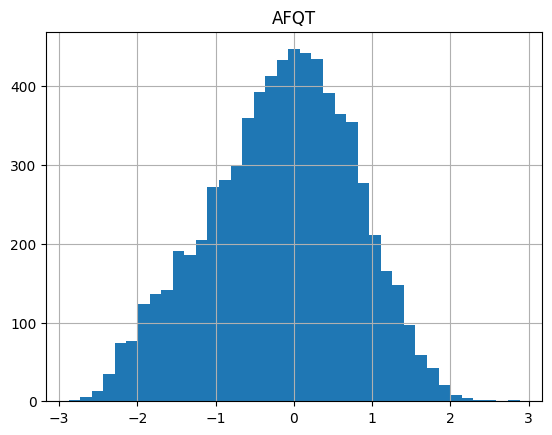

In [3]:
# Please write your executable code here
fig, ax = plt.subplots()
# Use optimal number of bins
# Source -  https://www.yourdatateacher.com/2021/11/22/how-to-choose-the-bins-of-a-histogram/
hist = df.hist('AFQT', ax=ax, bins="rice")

3. Create another variable (named exp) that transforms the variable TotalWeeksExp (i.e., lifetime weeks of experience) into years of experience (i.e., remember that one year has 52.14 weeks)

In [4]:
# Please write your executable code here
df['exp'] = (df['TotalWeeksExp'] / 52.14)
df

,educ,GPA grade 8,School Retention,Annual_Income,TotalWeeksExp,Black,Hispanic,White,m_college,minority,gender,asvabAR,asvabMK,asvabPC,asvabWK,AFQT,exp
PUBID - YTH ID CODE 1997,,,,,,,,,,,,,,,,,
1,16.0,3.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,female,0.066,0.707,-0.507,-0.772,-0.12650,NaN
2,14.0,3.5,0.0,115000.0,965.0,0.0,1.0,0.0,0.0,1.0,male,-0.238,0.259,1.080,-0.059,0.26050,18.507863
3,14.0,3.0,0.0,NaN,776.0,0.0,1.0,0.0,0.0,1.0,female,-1.009,-0.415,0.299,-0.703,-0.45700,14.883007
4,12.0,4.0,0.0,45000.0,1008.0,0.0,1.0,0.0,0.0,1.0,female,-0.598,0.646,-0.236,-0.542,-0.18250,19.332566
5,12.0,2.5,0.0,150000.0,890.0,0.0,1.0,0.0,0.0,1.0,male,NaN,NaN,NaN,NaN,NaN,17.069428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,8.0,2.0,0.0,90000.0,942.0,0.0,0.0,1.0,0.0,0.0,female,-0.281,-1.036,-1.826,-0.981,-1.03100,18.066743
9019,13.0,1.5,1.0,43000.0,824.0,0.0,1.0,0.0,0.0,1.0,male,-0.538,-0.254,-0.259,-1.153,-0.55100,15.803606
9020,14.0,3.5,0.0,NaN,494.0,0.0,0.0,1.0,0.0,0.0,male,1.434,1.153,1.683,1.096,1.34150,9.474492


4. Create a correlation matrix between annual income (`Annual_Income`), AFQT, educ, and exp. 

In [5]:
# Please write your executable code here
print(df[['Annual_Income', 'AFQT', 'educ', 'exp']].corr())

               Annual_Income      AFQT      educ       exp
Annual_Income       1.000000  0.320088  0.340262  0.192852
AFQT                0.320088  1.000000  0.586890  0.205490
educ                0.340262  0.586890  1.000000  0.287080
exp                 0.192852  0.205490  0.287080  1.000000


5. Interpret the correlations in the table 

### Exercise 2: Perform a Multivariate Regression Analysis

1. Using statsmodels, perform a multivariate regression analysis with annual income as the dependent variable, and educ and AFQT as the independent variables.

Code for fitting the regression model and Print the summary of the regression model.

In [6]:
# Please write your executable code here and print the summary
results = smf.ols("Annual_Income ~ educ + AFQT", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Annual_Income   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     327.7
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          7.23e-133
Time:                        22:19:33   Log-Likelihood:                -51455.
No. Observations:                4159   AIC:                         1.029e+05
Df Residuals:                    4156   BIC:                         1.029e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8889.6406   5951.140     -1.494      0.1

### Interpret the Regression Output

Based on the regression output from Exercise 2, answer the following:

1. Interpret the coefficient corresponding to the constant


2. Interpret the coefficient for educ and AFQT

3. What is the R-squared value, and what does it tell you about the model?


4. Is the relationship between annual income and AFQT statistically significant?


In [7]:
# For part 5 of this question - dropping variable AFQT from the model
results2 = smf.ols("Annual_Income ~ educ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Annual_Income   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     327.7
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          7.23e-133
Time:                        22:19:33   Log-Likelihood:                -51455.
No. Observations:                4159   AIC:                         1.029e+05
Df Residuals:                    4156   BIC:                         1.029e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8889.6406   5951.140     -1.494      0.1

5. Compare the coefficient on educ from this regression to the one that you obtain if you only include educ as the independent variable (i.e., drop AFQT).

### Exercise 3: Extend Multivariate Regression Analysis

Now, add the variable `m_college` to the model with `educ` and `AFQT` regression (the one with educ and AFQT as the independent variables) as one of the independent variables, which indicates whether an individual's mother has a college degree.

1. Write code for fitting the regression model that includes `m_college` variable with `educ` and `AFQT`. And print the summary of the regression model.

In [8]:
# Please write your executable code here
results3 = smf.ols("Annual_Income ~ educ + AFQT + C(m_college)", data=df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          Annual_Income   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          7.19e-122
Time:                        22:19:33   Log-Likelihood:                -48270.
No. Observations:                3900   AIC:                         9.655e+04
Df Residuals:                    3896   BIC:                         9.657e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6590.7293   6

2. Interpret the results (i.e., coefficients, statistical significance, and R-squared).


3. Do you think `m_collega` is a good exploratory/independent variable to add? Why?